# Performance evaluation of Terapixel rendering in Cloud (Super)computing

## DATA UNDERSTANDING

In [1]:
# Importing Important Library

import re
import numpy as np
import pandas as pd
import nltk

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from scipy import stats
from scipy.stats import kde

from sklearn.preprocessing import StandardScaler

In [2]:
# Loading Data

gpu = pd.read_csv('GPU.csv')
xy = pd.read_csv('Task-x-y.csv')
ac = pd.read_csv('Application-checkpoints.csv')


In [3]:
# Shape of the data frame 

print(f"Shape of GPU : {gpu.shape}")
print(f"Shape of Task-x-y : {xy.shape}")
print(f"Shape of Application-checkpoints : {ac.shape}")

Shape of GPU : (1543681, 8)
Shape of Task-x-y : (65793, 5)
Shape of Application-checkpoints : (660400, 6)


In [4]:
# Summary structure of each column of each data frame

print(gpu.info())
print(xy.info())
print(ac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543681 entries, 0 to 1543680
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       1543681 non-null  object 
 1   hostname        1543681 non-null  object 
 2   gpuSerial       1543681 non-null  int64  
 3   gpuUUID         1543681 non-null  object 
 4   powerDrawWatt   1543681 non-null  float64
 5   gpuTempC        1543681 non-null  int64  
 6   gpuUtilPerc     1543681 non-null  int64  
 7   gpuMemUtilPerc  1543681 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 94.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65793 entries, 0 to 65792
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   taskId  65793 non-null  object
 1   jobId   65793 non-null  object
 2   x       65793 non-null  int64 
 3   y       65793 non-null  int64 
 4   level   65793 non-nul

In [7]:
print("------------ GPU ----------------")
gpu.head(5)

------------ GPU ----------------


timestamp                                hostname  \
0  2018-11-08T08:27:10.314Z  8b6a0eebc87b4cb2b0539e81075191b900001C   
1  2018-11-08T08:27:10.192Z  d8241877cd994572b46c861e5d144c85000000   
2  2018-11-08T08:27:10.842Z  db871cd77a544e13bc791a64a0c8ed50000006   
3  2018-11-08T08:27:10.424Z  b9a1fa7ae2f74eb68f25f607980f97d7000010   
4  2018-11-08T08:27:10.937Z  db871cd77a544e13bc791a64a0c8ed50000003   

      gpuSerial                                   gpuUUID  powerDrawWatt  \
0  323217055910  GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534         131.55   
1  323617020295  GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f         117.03   
2  323217056562  GPU-f4597939-a0b4-e78a-2436-12dbab9a350f         121.64   
3  325217085931  GPU-ad773c69-c386-a4be-b214-1ea4fc6045df          50.23   
4  323217056464  GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2         141.82   

   gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
0        48           92              53  
1        40           92              48  
2        45           91              44  
3        38           90              43  
4        41           90              47

In [5]:
print("------------ task-x-y ----------------")
xy.head(5)

------------ task-x-y ----------------


taskId  \
0  00004e77-304c-4fbd-88a1-1346ef947567   
1  0002afb5-d05e-4da9-bd53-7b6dc19ea6d4   
2  0003c380-4db9-49fb-8e1c-6f8ae466ad85   
3  000993b6-fc88-489d-a4ca-0a44fd800bd3   
4  000b158b-0ba3-4dca-bf5b-1b3bd5c28207   

                                             jobId    x    y  level  
0  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  116  178     12  
1  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  142  190     12  
2  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  142   86     12  
3  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  235   11     12  
4  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  171   53     12

In [6]:
print("------------ ac ----------------")
ac.head(5)

------------ ac ----------------


timestamp                                hostname  \
0  2018-11-08T07:41:55.921Z  0d56a730076643d585f77e00d2d8521a00000N   
1  2018-11-08T07:42:29.842Z  0d56a730076643d585f77e00d2d8521a00000N   
2  2018-11-08T07:42:29.845Z  0d56a730076643d585f77e00d2d8521a00000N   
3  2018-11-08T07:42:29.845Z  0d56a730076643d585f77e00d2d8521a00000N   
4  2018-11-08T07:43:13.957Z  0d56a730076643d585f77e00d2d8521a00000N   

       eventName eventType                                            jobId  \
0         Tiling      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
1  Saving Config     START  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
2  Saving Config      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
3         Render     START  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
4    TotalRender      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                 taskId  
0  b47f0263-ba1c-48a7-8d29-4bf021b72043  
1  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
2  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
3  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
4  20fb9fcf-a927-4a4b-a64c-70258b66b42d

In [10]:
# To check the resources available

print("Available GPU cards:", len(gpu['gpuSerial'].unique()))

Available GPU cards: 1024


In [11]:
# Get the count of each eventName
ac.groupby(by='eventName').count().reset_index()\
[['eventName', 'jobId', 'taskId']].rename(columns={'jobId': 'JobCount'})


eventName  JobCount  taskId
0         Render    132080  132080
1  Saving Config    132080  132080
2         Tiling    132080  132080
3    TotalRender    132080  132080
4      Uploading    132080  132080

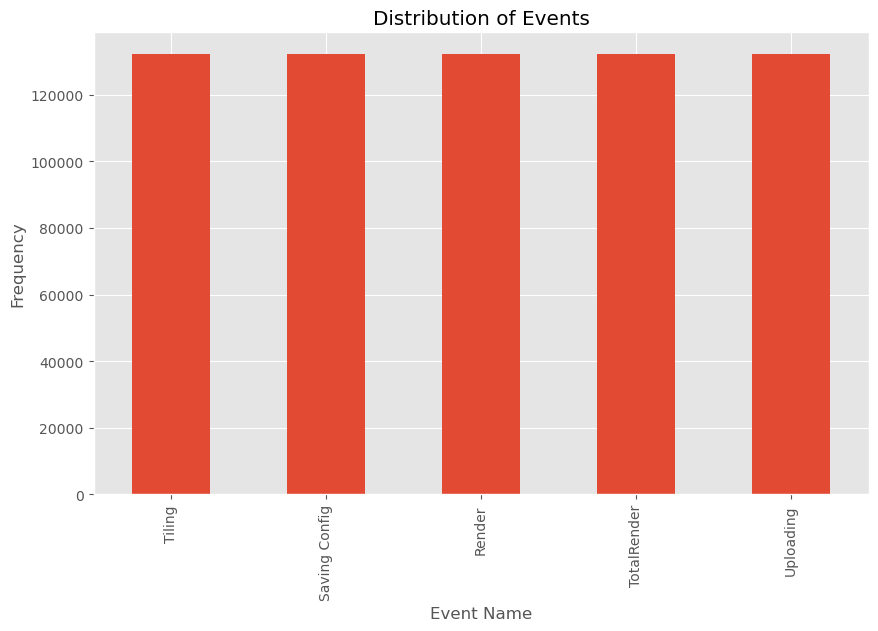

In [12]:
# Plot to visualize the frequency of taskId each event

event_counts = ac['eventName'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.xlabel('Event Name')
plt.ylabel('Frequency')
plt.title('Distribution of Events')
plt.show()


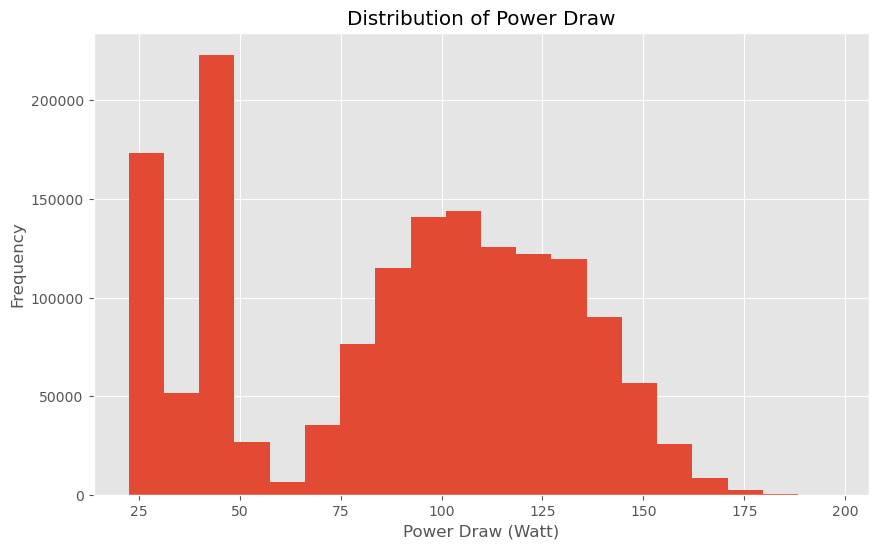

In [31]:
# Plot the histogram of power draw for undersatnding the distribution of power consumption across the GPU units

plt.figure(figsize=(10, 6))
plt.hist(gpu['powerDrawWatt'], bins=20)  
plt.title('Distribution of Power Draw')
plt.xlabel('Power Draw (Watt)')
plt.ylabel('Frequency')
plt.show()

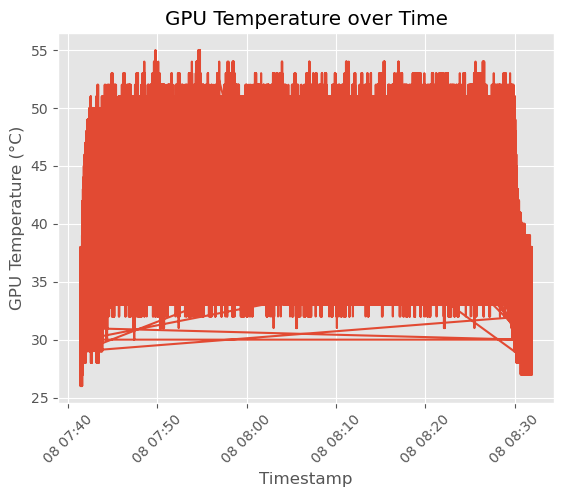

In [14]:
# Plot the GPU temperature (gpuTempC) over time 

# Convert the timestamp column to datetime format
df = gpu
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot the GPU temperature over time
plt.plot(df['timestamp'], df['gpuTempC'])
plt.title('GPU Temperature over Time')
plt.xlabel('Timestamp')
plt.ylabel('GPU Temperature (°C)')
plt.xticks(rotation=45)  
plt.show()

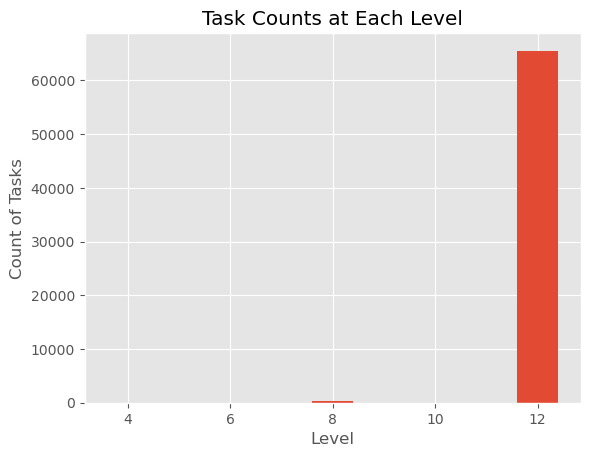

In [15]:
# Plotting the task on various levels

df = xy
task_counts = df['level'].value_counts().sort_index()

# Plotting the bar plot
plt.bar(task_counts.index, task_counts.values)

# Setting labels and title
plt.xlabel('Level')
plt.ylabel('Count of Tasks')
plt.title('Task Counts at Each Level')

# Display the plot
plt.show()

## DATA CLEANING

In [18]:
# Timestamp datatype is changed to Datetime from object

gpu['timestamp'] = pd.to_datetime(gpu['timestamp'])
ac['timestamp'] = pd.to_datetime(ac['timestamp'])

print("Data type of timestamp in GPU", gpu['timestamp'].dtype)
print("Data type of timestamp in ac", ac['timestamp'].dtype)


Data type of timestamp in GPU datetime64[ns, UTC]
Data type of timestamp in ac datetime64[ns, UTC]


In [24]:
# Dropping all the rows with NA entries.

ac.dropna(inplace=True)
xy.dropna(inplace=True)
gpu.dropna(inplace=True)

In [25]:
# Checking for any duplicate entries in the dataset for each data frames

print(f"Duplicate entried in  GPU : {gpu.duplicated().sum()}")
print(f"Duplicate entried in  Task-x-y : {xy.duplicated().sum()}")
print(f"Duplicate entried in  Application-checkpoints : {ac.duplicated().sum()}")

Duplicate entried in  GPU : 9
Duplicate entried in  Task-x-y : 0
Duplicate entried in  Application-checkpoints : 2470


In [26]:
# Dropping all the rows with duplicate entries.

gpu.drop_duplicates(inplace=True)
xy.drop_duplicates(inplace=True)
ac.drop_duplicates(inplace=True)

In [27]:
# Checking for any duplicate entries post drop()

print(f"Duplicate entried in  GPU : {gpu.duplicated().sum()}")
print(f"Duplicate entried in  Task-x-y : {xy.duplicated().sum()}")
print(f"Duplicate entried in  Application-checkpoints : {ac.duplicated().sum()}")

Duplicate entried in  GPU : 0
Duplicate entried in  Task-x-y : 0
Duplicate entried in  Application-checkpoints : 0


## GOAL 1: Efficiency of the task scheduling process

In [38]:
#Count of  hostname
hostname_counts = ac['hostname'].value_counts()

# Set the desired figure width and height
fig_width = 150
fig_height = 150

# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


# Plotting to visualize the distribution of tasks across hostnames

plt.bar(hostname_counts.index, hostname_counts.values)
plt.title('Distribution of Tasks across Hostnames')
plt.xlabel('Hostname')
plt.ylabel('Task Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Perform the Shapiro-Wilk test for normality
p_value = stats.shapiro(hostname_counts.values)

# Print the p-value
print("Shapiro-Wilk test p-value:", p_value)


Shapiro-Wilk test p-value: ShapiroResult(statistic=0.5360183119773865, pvalue=1.401298464324817e-45)


In [33]:
# Create the kernel density estimation (KDE)
kde = kde.gaussian_kde(hostname_counts.values)

# Generate the x-values for evaluation
x = np.linspace(min(hostname_counts.values), max(hostname_counts.values), 1000)

# Evaluate the density estimation curve
y = kde(x)

# Plot the histogram

# Set the desired figure width and height
fig_width = 150
fig_height = 150

# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
plt.bar(hostname_counts.index, hostname_counts.values, label='Task Count')

# Plot the fitted density estimation curve
plt.plot(x, y, 'r', linewidth=2, label='Density Estimation')

plt.title('Distribution of Tasks across Hostnames with Density Estimation')
plt.xlabel('Hostname')
plt.ylabel('Task Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()


/var/folders/50/bwnknb495bn9xjf36lgd79h00000gn/T/ipykernel_64657/2284817683.py:5: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = kde.gaussian_kde(hostname_counts.values)


## GOAL2 :  Which event types dominate task runtimes?

In [34]:
# Filter the DataFrame for start and stop events
start_events = ac[ac['eventType'] == 'START']
stop_events = ac[ac['eventType'] == 'STOP']


In [39]:
stop_events.head(2)

timestamp                                hostname  \
0 2018-11-08 07:41:55.921000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
2 2018-11-08 07:42:29.845000+00:00  0d56a730076643d585f77e00d2d8521a00000N   

       eventName eventType                                            jobId  \
0         Tiling      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
2  Saving Config      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                 taskId  
0  b47f0263-ba1c-48a7-8d29-4bf021b72043  
2  20fb9fcf-a927-4a4b-a64c-70258b66b42d

In [40]:
# Merge start and stop events based on jobId, taskId, and condition for positive runtime

task_runtimes = start_events.merge(stop_events, on=['jobId', 'taskId', 'eventName', 'hostname'], suffixes=('_start', '_stop'))
task_runtimes = task_runtimes[task_runtimes['timestamp_stop'] > task_runtimes['timestamp_start']]

task_runtimes.head(2)

timestamp_start                                hostname  \
0 2018-11-08 07:42:29.842000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
1 2018-11-08 07:42:29.845000+00:00  0d56a730076643d585f77e00d2d8521a00000N   

       eventName eventType_start  \
0  Saving Config           START   
1         Render           START   

                                             jobId  \
0  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
1  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                 taskId                   timestamp_stop  \
0  20fb9fcf-a927-4a4b-a64c-70258b66b42d 2018-11-08 07:42:29.845000+00:00   
1  20fb9fcf-a927-4a4b-a64c-70258b66b42d 2018-11-08 07:43:10.965000+00:00   

  eventType_stop  
0           STOP  
1           STOP

In [81]:
# Calculate the runtime for each task
task_runtimes['runtime'] = pd.to_datetime(task_runtimes['timestamp_stop']) - pd.to_datetime(task_runtimes['timestamp_start'])

task_runtimes.info()
task_runtimes.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332670 entries, 0 to 332669
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   timestamp_start  332670 non-null  datetime64[ns, UTC]
 1   hostname         332670 non-null  object             
 2   eventName        332670 non-null  object             
 3   eventType_start  332670 non-null  object             
 4   jobId            332670 non-null  object             
 5   taskId           332670 non-null  object             
 6   timestamp_stop   332670 non-null  datetime64[ns, UTC]
 7   eventType_stop   332670 non-null  object             
 8   runtime          332670 non-null  timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), object(6), timedelta64[ns](1)
memory usage: 25.4+ MB


timestamp_start                                hostname  \
0 2018-11-08 07:42:29.842000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
1 2018-11-08 07:42:29.845000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
2 2018-11-08 07:43:56.239000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
3 2018-11-08 07:44:47.555000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
4 2018-11-08 07:47:38.457000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
5 2018-11-08 07:47:38.464000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
6 2018-11-08 07:49:41.858000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
7 2018-11-08 08:03:09.698000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
8 2018-11-08 08:03:42.209000+00:00  0d56a730076643d585f77e00d2d8521a00000N   
9 2018-11-08 08:03:46.513000+00:00  0d56a730076643d585f77e00d2d8521a00000N   

       eventName eventType_start  \
0  Saving Config           START   
1         Render           START   
2      Uploading           START   
3  Saving Config           START   
4      Uploading           START   
5         Tiling           START   
6         Tiling           START   
7  Saving Config           START   
8         Tiling           START   
9  Saving Config           START   

                                             jobId  \
0  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
1  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
2  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
3  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
4  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
5  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
6  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
7  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
8  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
9  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                 taskId                   timestamp_stop  \
0  20fb9fcf-a927-4a4b-a64c-70258b66b42d 2018-11-08 07:42:29.845000+00:00   
1  20fb9fcf-a927-4a4b-a64c-70258b66b42d 2018-11-08 07:43:10.965000+00:00   
2  3dd4840c-47f2-4dcc-a775-df2ef6498d71 2018-11-08 07:43:57.245000+00:00   
3  c9e249d8-52ed-40c6-8713-b5cbf02ea87e 2018-11-08 07:44:47.557000+00:00   
4  c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba 2018-11-08 07:47:39.357000+00:00   
5  c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba 2018-11-08 07:47:39.344000+00:00   
6  bce8d6bb-8cfe-475b-ae03-af28d1fac10a 2018-11-08 07:49:42.886000+00:00   
7  fb8b9faa-be63-426c-9742-be30e5298f5b 2018-11-08 08:03:09.701000+00:00   
8  fb8b9faa-be63-426c-9742-be30e5298f5b 2018-11-08 08:03:43.060000+00:00   
9  674ef19f-b3cb-4aa5-8980-f37cbbca324d 2018-11-08 08:03:46.515000+00:00   

  eventType_stop                runtime  
0           STOP 0 days 00:00:00.003000  
1           STOP 0 days 00:00:41.120000  
2           STOP 0 days 00:00:01.006000  
3           STOP 0 days 00:00:00.002000  
4           STOP 0 days 00:00:00.900000  
5           STOP 0 days 00:00:00.880000  
6           STOP 0 days 00:00:01.028000  
7           STOP 0 days 00:00:00.003000  
8           STOP 0 days 00:00:00.851000  
9           STOP 0 days 00:00:00.002000

In [42]:
print(task_runtimes['runtime'].describe())

count                       332670
mean     0 days 00:00:17.244289587
std      0 days 00:00:20.582508507
min         0 days 00:00:00.002000
25%         0 days 00:00:00.902000
50%         0 days 00:00:01.066000
75%         0 days 00:00:40.750000
max         0 days 00:01:33.697000
Name: runtime, dtype: object


In [43]:
# Get the sum of runtime for each eventName
task_runtimes.groupby(by='eventName').sum().reset_index()\
[['eventName', 'runtime']].rename(columns={'runtime': 'Total_runtime'})


/var/folders/50/bwnknb495bn9xjf36lgd79h00000gn/T/ipykernel_64657/2265504816.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  task_runtimes.groupby(by='eventName').sum().reset_index()\


eventName           Total_runtime
0         Render 31 days 17:57:37.245000
1  Saving Config  0 days 00:02:44.727000
2         Tiling  0 days 17:59:11.182000
3    TotalRender 32 days 19:46:07.991000
4      Uploading  1 days 01:45:16.672000

In [44]:
# Get the mean of runtime for each eventName
task_runtimes.groupby(by='eventName').mean().reset_index()\
[['eventName', 'runtime']].rename(columns={'runtime': 'Avg_runtime'})


/var/folders/50/bwnknb495bn9xjf36lgd79h00000gn/T/ipykernel_64657/4228784894.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  task_runtimes.groupby(by='eventName').mean().reset_index()\


eventName               Avg_runtime
0         Render 0 days 00:00:41.227902200
1  Saving Config 0 days 00:00:00.002475831
2         Tiling 0 days 00:00:00.973204406
3    TotalRender 0 days 00:00:42.624342306
4      Uploading 0 days 00:00:01.393523191

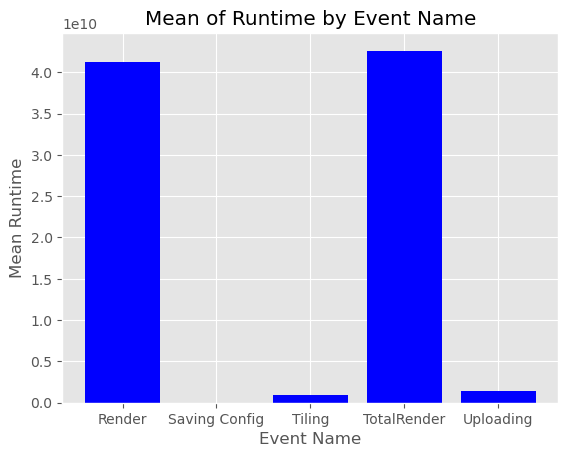

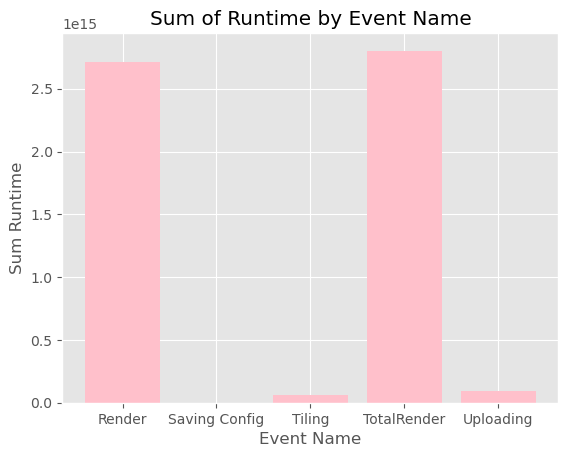

In [17]:
# Calculate the mean and sum of runtime for each eventName 
runtime_stats = task_runtimes.groupby('eventName')['runtime'].agg(['mean', 'sum'])

# Plotting the bar graph for mean values
plt.bar(runtime_stats.index, runtime_stats['mean'], color='blue')
plt.title("Mean of Runtime by Event Name")
plt.xlabel("Event Name")
plt.ylabel("Mean Runtime")
plt.show()

# Plotting the bar graph for sum values
plt.bar(runtime_stats.index, runtime_stats['sum'], color='pink')
plt.title("Sum of Runtime by Event Name")
plt.xlabel("Event Name")
plt.ylabel("Sum Runtime")
plt.show()


 So from  the above barplot it is very much clear that "Render" event dominates task runtimes.
### CONCLUSION : it is very clear that TotalRender takes significant time thus is the dominant event is task runtime followed by Render, Uploading, Tilling and then Saving Config. Also,  TotalRender is the summation of runtimes from the rest of the event.

## GOAL 3 : What is the interplay between GPU temperature and performance?

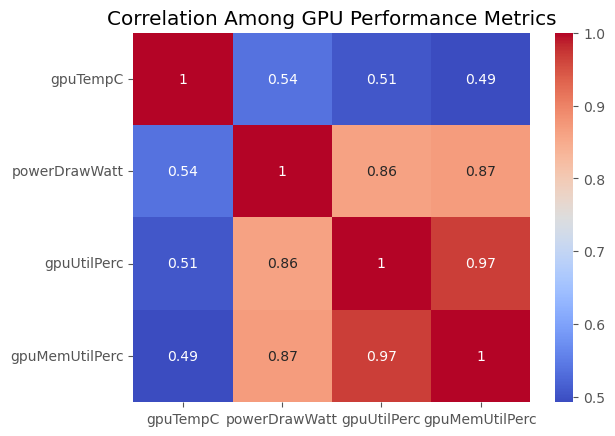

In [45]:
# Calculate the correlation matrix
corr_matrix = gpu[['gpuTempC', 'powerDrawWatt', 'gpuUtilPerc', 'gpuMemUtilPerc']].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Among GPU Performance Metrics')
plt.show()

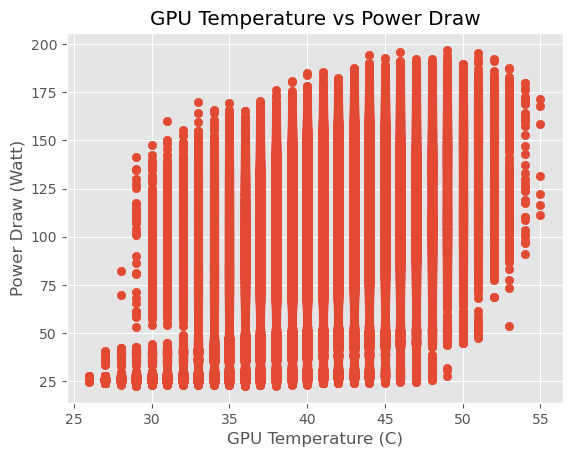

In [47]:

# Plot scatter plot: GPU Temperature vs Power Draw
plt.scatter(gpu['gpuTempC'], gpu['powerDrawWatt'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('Power Draw (Watt)')
plt.title('GPU Temperature vs Power Draw')
plt.show()


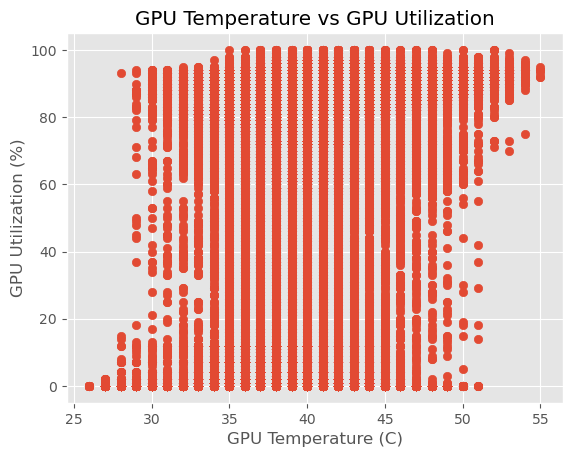

In [48]:
# Plot scatter plot: GPU Temperature vs GPU Utilization
plt.scatter(gpu['gpuTempC'], gpu['gpuUtilPerc'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('GPU Utilization (%)')
plt.title('GPU Temperature vs GPU Utilization')
plt.show()

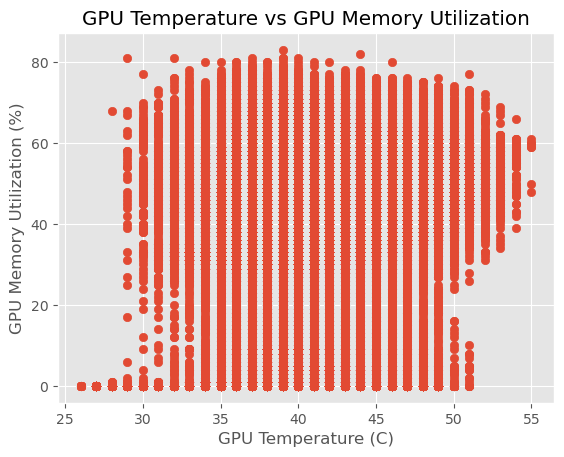

In [49]:
# Plot line plot:  GPU Temperature vs GPU Memory Utilization

plt.scatter(gpu['gpuTempC'], gpu['gpuMemUtilPerc'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('GPU Memory Utilization (%)')
plt.title('GPU Temperature vs GPU Memory Utilization')
plt.show()

## GOAL 4 : What is the interplay Investigating the correlations between GPU performance metrics and task runtimes


Calculate the correlation between the GPU performance metrics (e.g., gpuTempC, gpuUtilPerc, gpuMemUtilPerc) and the task runtimes.

### Merge the task_runtimes with the gpu_data

In [50]:
# Merging dataframes using Chunks
# Define the chunk size
chunk_size = 10000
gpu_data = gpu
task_runtimes['timestamp_start'] = pd.to_datetime(task_runtimes['timestamp_start'])
task_runtimes['timestamp_stop'] = pd.to_datetime(task_runtimes['timestamp_stop'])


# Split the DataFrames into chunks

# Get the unique hostnames from the task_runtimes DataFrame
unique_hostnames = task_runtimes['hostname'].unique()

# Calculate the number of chunks based on the minimum between chunk_size and the number of unique hostnames
num_chunks = min(chunk_size, len(unique_hostnames))

# Split the task_runtimes DataFrame into chunks based on hostname
task_runtimes_chunks = np.array_split(task_runtimes, num_chunks)

# Get the unique hostnames from the gpu_data DataFrame
unique_hostnames = gpu_data['hostname'].unique()

# Calculate the number of chunks based on the minimum between chunk_size and the number of unique hostnames
num_chunks = min(chunk_size, len(unique_hostnames))

# Split the gpu_data DataFrame into chunks based on hostname
gpu_data_chunks = np.array_split(gpu_data, num_chunks)

# Initialize an empty list to store the merged chunks
merged_chunks = []

# Merge the chunks iteratively
for task_chunk, gpu_chunk in zip(task_runtimes_chunks, gpu_data_chunks):
    merged_chunk = task_chunk.merge(gpu_chunk, on='hostname')
    merged_chunks.append(merged_chunk)

# Concatenate the merged chunks into a single DataFrame
merged_data = pd.concat(merged_chunks)

# Print the merged DataFrame information
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 487502 entries, 0 to 396
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   timestamp_start  487502 non-null  datetime64[ns, UTC]
 1   hostname         487502 non-null  object             
 2   eventName        487502 non-null  object             
 3   eventType_start  487502 non-null  object             
 4   jobId            487502 non-null  object             
 5   taskId           487502 non-null  object             
 6   timestamp_stop   487502 non-null  datetime64[ns, UTC]
 7   eventType_stop   487502 non-null  object             
 8   runtime          487502 non-null  timedelta64[ns]    
 9   timestamp        487502 non-null  datetime64[ns, UTC]
 10  gpuSerial        487502 non-null  int64              
 11  gpuUUID          487502 non-null  object             
 12  powerDrawWatt    487502 non-null  float64            
 13  gp

In [51]:
merged_data.head(4)

timestamp_start                                hostname  \
0 2018-11-08 07:41:31.727000+00:00  0d56a730076643d585f77e00d2d8521a00000R   
1 2018-11-08 07:41:31.978000+00:00  5903af3699134795af7eafc605ae5fc7000003   
2 2018-11-08 07:41:31.978000+00:00  5903af3699134795af7eafc605ae5fc7000003   
3 2018-11-08 07:41:31.933000+00:00  5903af3699134795af7eafc605ae5fc7000019   

       eventName eventType_start  \
0  Saving Config           START   
1    TotalRender           START   
2    TotalRender           START   
3         Render           START   

                                             jobId  \
0  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
1  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
2  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
3  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                 taskId                   timestamp_stop  \
0  14ec82ff-253b-4479-bb90-a34f5a9ae957 2018-11-08 07:41:31.730000+00:00   
1  715401e9-245c-4d52-a6d6-c185606fe38a 2018-11-08 07:42:37.012000+00:00   
2  715401e9-245c-4d52-a6d6-c185606fe38a 2018-11-08 07:42:37.012000+00:00   
3  7ee60ce5-f915-4d1a-987f-7f6bca773702 2018-11-08 07:42:14.243000+00:00   

  eventType_stop                runtime                        timestamp  \
0           STOP 0 days 00:00:00.003000 2018-11-08 08:27:25.714000+00:00   
1           STOP 0 days 00:01:05.034000 2018-11-08 08:27:15.813000+00:00   
2           STOP 0 days 00:01:05.034000 2018-11-08 08:27:25.899000+00:00   
3           STOP 0 days 00:00:42.310000 2018-11-08 08:27:46.658000+00:00   

      gpuSerial                                   gpuUUID  powerDrawWatt  \
0  325117064399  GPU-340bc638-6103-69c6-776c-cd58a3a0eca6          44.86   
1  325217086163  GPU-047c5260-befd-0cfc-7b53-a12393396451         154.45   
2  325217086163  GPU-047c5260-befd-0cfc-7b53-a12393396451         116.27   
3  324917053291  GPU-e3416ab2-b78a-1da0-4479-16156e73f680         115.78   

   gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
0        36            0               0  
1        43           90              59  
2        43           97              57  
3        38           90              49

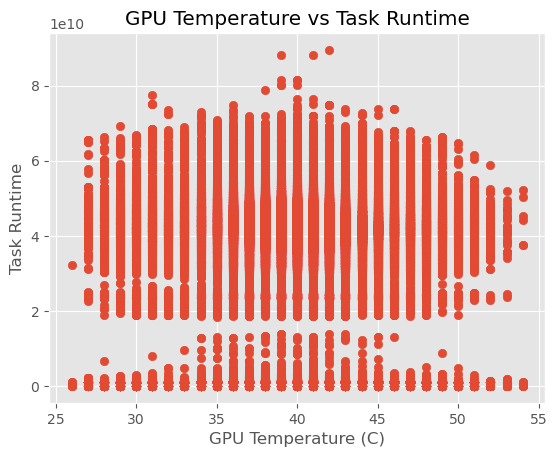

In [61]:
# Plot scatter plots to visualize individual correlations

# GPU Temperature vs Task Runtime
plt.scatter(merged_data['gpuTempC'], merged_data['runtime'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('Task Runtime')
plt.title('GPU Temperature vs Task Runtime')
plt.show()

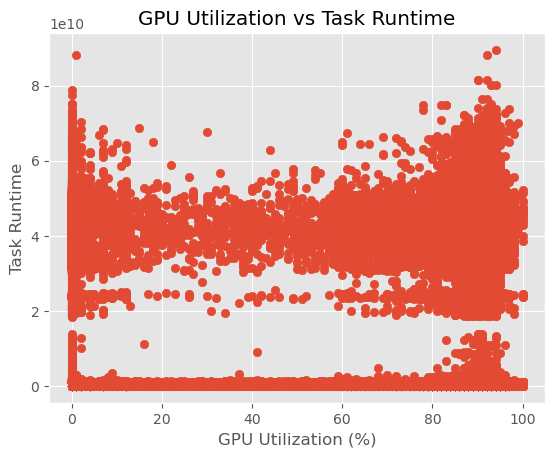

In [54]:
# GPU Utilization vs Task Runtime

plt.scatter(merged_data['gpuUtilPerc'], merged_data['runtime'])
plt.xlabel('GPU Utilization (%)')
plt.ylabel('Task Runtime')
plt.title('GPU Utilization vs Task Runtime')
plt.show()

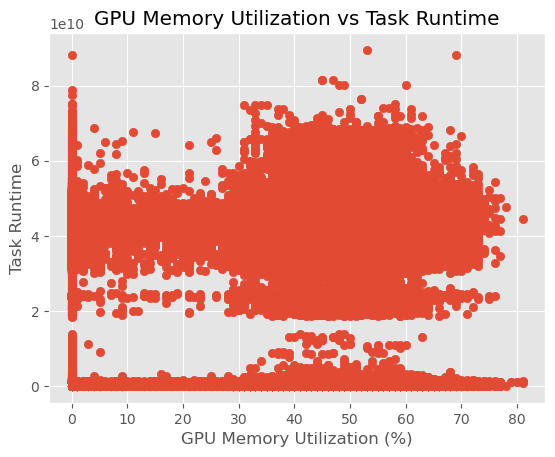

In [55]:
# GPU Memory Utilization vs Task Runtime

plt.scatter(merged_data['gpuMemUtilPerc'], merged_data['runtime'])
plt.xlabel('GPU Memory Utilization (%)')
plt.ylabel('Task Runtime')
plt.title('GPU Memory Utilization vs Task Runtime')
plt.show()

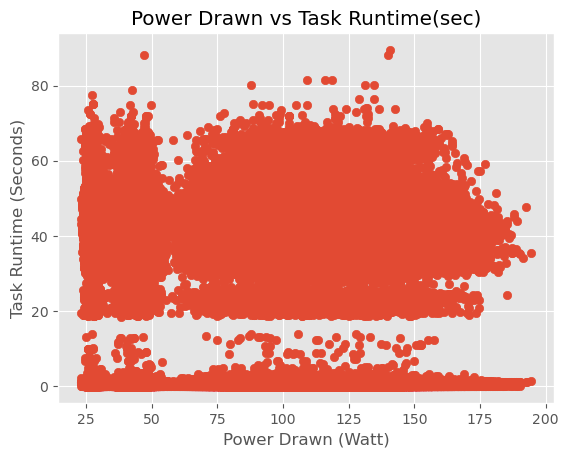

In [65]:
# Power Drawn vs Task Runtime

# Convert timedelta64 to seconds
merged_data['runtime_seconds'] = merged_data['runtime'].dt.total_seconds()


plt.scatter(merged_data['powerDrawWatt'], merged_data['runtime_seconds'])
plt.xlabel('Power Drawn (Watt)')
plt.ylabel('Task Runtime (Seconds)')
plt.title('Power Drawn vs Task Runtime(sec)')
plt.show()

## GOAL 5:  Variations in the `x` and `y` coordinates of the rendered tiles and how they relate to task runtimes.

In [56]:
#Calculating statistics of the x and y coordinates

print('Stats for X-coordinate : ')
x_stats = xy['x'].describe() 
print(x_stats)

print ("------------")
print('Stats for Y-coordinate : ')
y_stats = xy['y'].describe()
print(y_stats)


Stats for X-coordinate : 
count    65793.000000
mean       127.031143
std         74.135963
min          0.000000
25%         63.000000
50%        127.000000
75%        191.000000
max        255.000000
Name: x, dtype: float64
------------
Stats for Y-coordinate : 
count    65793.000000
mean       127.031143
std         74.135963
min          0.000000
25%         63.000000
50%        127.000000
75%        191.000000
max        255.000000
Name: y, dtype: float64


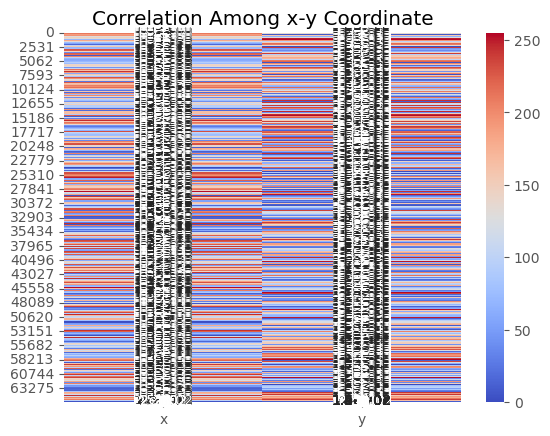

In [66]:
#Correlation of x and y

corr_xy = xy[['x','y']]
# Plot a heatmap of the correlation matrix
sns.heatmap(corr_xy, annot=True, cmap='coolwarm')
plt.title('Correlation Among x-y Coordinate')
plt.show()

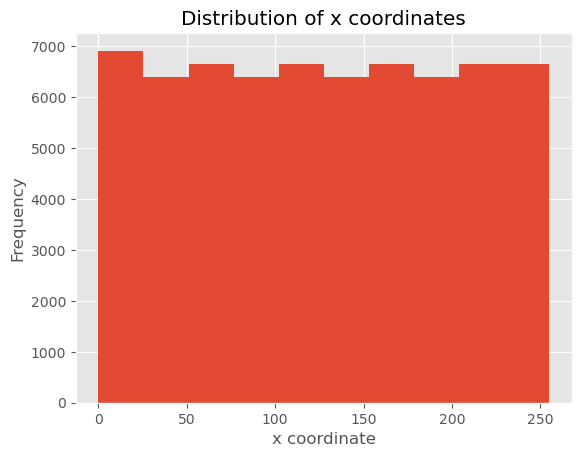

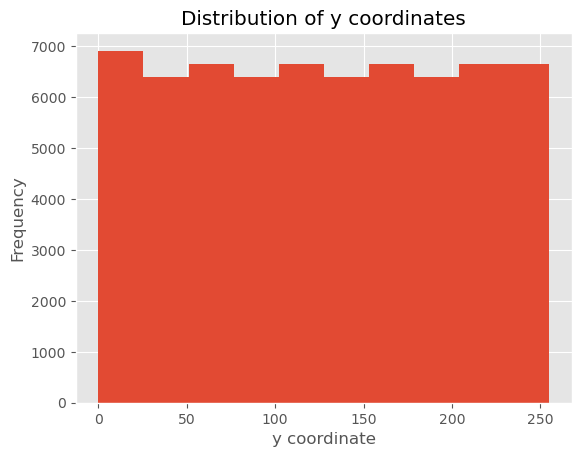

In [67]:
# Distribution of x and y coordinates

plt.hist(xy['x'], bins=10)
plt.xlabel('x coordinate')
plt.ylabel('Frequency')
plt.title('Distribution of x coordinates')
plt.show()

plt.hist(xy['y'], bins=10)
plt.xlabel('y coordinate')
plt.ylabel('Frequency')
plt.title('Distribution of y coordinates')
plt.show()


In [68]:
#Merging 2 dataframes based on columns using join operation

merged_table1 = xy.merge( merged_data, on=['jobId','taskId'])

merged_table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487502 entries, 0 to 487501
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   taskId           487502 non-null  object             
 1   jobId            487502 non-null  object             
 2   x                487502 non-null  int64              
 3   y                487502 non-null  int64              
 4   level            487502 non-null  int64              
 5   timestamp_start  487502 non-null  datetime64[ns, UTC]
 6   hostname         487502 non-null  object             
 7   eventName        487502 non-null  object             
 8   eventType_start  487502 non-null  object             
 9   timestamp_stop   487502 non-null  datetime64[ns, UTC]
 10  eventType_stop   487502 non-null  object             
 11  runtime          487502 non-null  timedelta64[ns]    
 12  timestamp        487502 non-null  datetime64[ns, UTC]
 13 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483236 entries, 0 to 483235
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   taskId           483236 non-null  object         
 1   jobId            483236 non-null  object         
 2   x                483236 non-null  int64          
 3   y                483236 non-null  int64          
 4   level            483236 non-null  int64          
 5   timestamp_start  483236 non-null  object         
 6   hostname         483236 non-null  object         
 7   eventName        483236 non-null  object         
 8   eventType_start  483236 non-null  object         
 9   timestamp_stop   483236 non-null  object         
 10  eventType_stop   483236 non-null  object         
 11  runtime          483236 non-null  timedelta64[ns]
 12  timestamp        483236 non-null  object         
 13  gpuSerial        483236 non-null  int64          
 14  gpuU

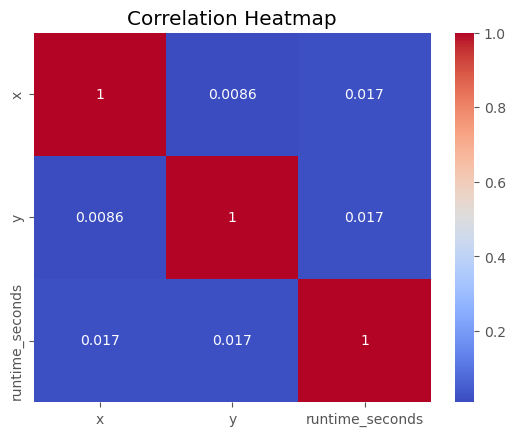

In [78]:
#Calculate correlations between x -y coordinates  and runtime

merged_table1['runtime_seconds'] = merged_table1['runtime'] / np.timedelta64(1, 's')

merged_table1.info()
correlation_x_runtime = merged_table1['x'].corr(merged_table1['runtime_seconds'])
correlation_y_runtime = merged_table1['y'].corr(merged_table1['runtime_seconds'])
print('correlation of x and runtime', correlation_x_runtime)
print('correlation of y and runtime', correlation_y_runtime)

# Plot a heatmap of the correlation matrix
correlation_matrix = merged_table1[['x', 'y', 'runtime_seconds']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

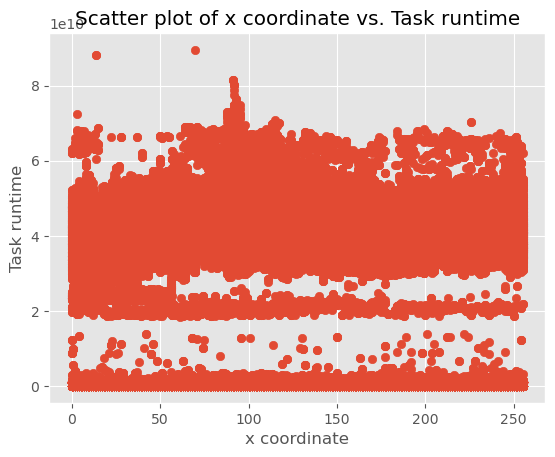

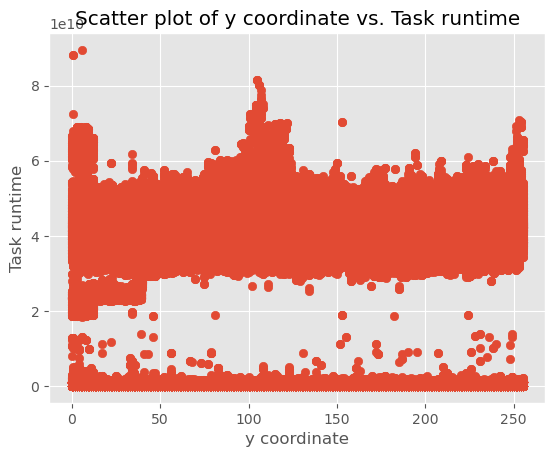

In [70]:
# Scatter plot of x coordinate vs. Task runtime

plt.scatter(merged_table1['x'], merged_table1['runtime'])
plt.xlabel('x coordinate')
plt.ylabel('Task runtime')
plt.title('Scatter plot of x coordinate vs. Task runtime')
plt.show()

# Scatter plot of y coordinate vs. Task runtime

plt.scatter(merged_table1['y'], merged_table1['runtime'])
plt.xlabel('y coordinate')
plt.ylabel('Task runtime')
plt.title('Scatter plot of y coordinate vs. Task runtime')
plt.show()


## GOAL 6: GPU card performance:

In [71]:
# Identifying the list of unique GPU cards

unique_count = len(gpu_data['gpuSerial'].unique())
unique_count1 = len(merged_table1['gpuSerial'].unique())
unique_cards = gpu_data['gpuSerial'].unique()
unique_cards1 = merged_table1['gpuSerial'].unique()

In [82]:
# To check if there is any GPU card which is not present in the GPU details 
print('Original GPU card Count : ', unique_count)
print('The GPU card Count from our merged dataframe : ',unique_count1)

absent_elements = set(unique_cards) - set(unique_cards1)
if len(absent_elements) > 0:
    print("GPU card not in the new merged dataframe:", absent_elements)
else:
    print("No GPU card missing in the new merged dataframe")    

Original GPU card Count :  1024
The GPU card Count from our merged dataframe :  1023
GPU card not in the new merged dataframe: {325217086221}


In [75]:
#Calculate statistics or analyze metrics for each GPU card:

for card in unique_cards1:
    card_data = gpu_data[gpu_data['gpuSerial'] == card]
    
    # Calculate mean power draw for the card
    mean_power_draw = card_data['powerDrawWatt'].mean()
    
    # Calculate mean GPU temperature for the card
    mean_gpu_temp = card_data['gpuTempC'].mean()
    
    # Calculate mean GPU utilization for the card
    mean_gpu_utilization = card_data['gpuUtilPerc'].mean()
    
    # Calculate mean GPU Memory utilization for the card
    mean_gpu_mem = card_data['gpuMemUtilPerc'].mean()
    
    
    # Print the performance metrics for the card
    print(f"GPU Card: {card}")
    print(f"Mean Power Draw: {mean_power_draw} Watts")
    print(f"Mean GPU Temperature: {mean_gpu_temp} °C")
    print(f"Mean GPU Utilization: {mean_gpu_utilization}%")
    print(f"Mean GPU Memory Utilization: {mean_gpu_utilization}%")
    print("----------------------------------------------")

GPU Card: 325117173029
Mean Power Draw: 95.11199866755514 Watts
Mean GPU Temperature: 46.153231179213854 °C
Mean GPU Utilization: 62.27248500999334%
Mean GPU Memory Utilization: 62.27248500999334%
----------------------------------------------
GPU Card: 323617020500
Mean Power Draw: 95.49067288474355 Watts
Mean GPU Temperature: 41.770819453697534 °C
Mean GPU Utilization: 61.53364423717522%
Mean GPU Memory Utilization: 61.53364423717522%
----------------------------------------------
GPU Card: 323617021461
Mean Power Draw: 87.0343399999999 Watts
Mean GPU Temperature: 39.59133333333333 °C
Mean GPU Utilization: 60.954%
Mean GPU Memory Utilization: 60.954%
----------------------------------------------
GPU Card: 323617042495
Mean Power Draw: 96.01738840772812 Watts
Mean GPU Temperature: 42.73151232511659 °C
Mean GPU Utilization: 61.574950033311126%
Mean GPU Memory Utilization: 61.574950033311126%
----------------------------------------------
GPU Card: 323617020564
Mean Power Draw: 89.1626

GPU Card: 325117172344
Mean Power Draw: 88.99872000000005 Watts
Mean GPU Temperature: 37.852 °C
Mean GPU Utilization: 62.768%
Mean GPU Memory Utilization: 62.768%
----------------------------------------------
GPU Card: 325017017463
Mean Power Draw: 85.46780146568952 Watts
Mean GPU Temperature: 36.85676215856096 °C
Mean GPU Utilization: 63.95403064623584%
Mean GPU Memory Utilization: 63.95403064623584%
----------------------------------------------
GPU Card: 323617043168
Mean Power Draw: 91.48954030646244 Watts
Mean GPU Temperature: 39.579613590939374 °C
Mean GPU Utilization: 63.896735509660225%
Mean GPU Memory Utilization: 63.896735509660225%
----------------------------------------------
GPU Card: 325217086299
Mean Power Draw: 84.85997001998675 Watts
Mean GPU Temperature: 39.40606262491672 °C
Mean GPU Utilization: 61.62291805463025%
Mean GPU Memory Utilization: 61.62291805463025%
----------------------------------------------
GPU Card: 325017019144
Mean Power Draw: 88.59454909819648 

GPU Card: 325017048580
Mean Power Draw: 90.60699665551854 Watts
Mean GPU Temperature: 39.79063545150502 °C
Mean GPU Utilization: 64.23277591973245%
Mean GPU Memory Utilization: 64.23277591973245%
----------------------------------------------
GPU Card: 323617020999
Mean Power Draw: 84.87802263648463 Watts
Mean GPU Temperature: 42.797603195739015 °C
Mean GPU Utilization: 63.31158455392809%
Mean GPU Memory Utilization: 63.31158455392809%
----------------------------------------------
GPU Card: 325017048895
Mean Power Draw: 86.82321119253825 Watts
Mean GPU Temperature: 39.217188540972685 °C
Mean GPU Utilization: 63.59493670886076%
Mean GPU Memory Utilization: 63.59493670886076%
----------------------------------------------
GPU Card: 323617020887
Mean Power Draw: 84.27671333333332 Watts
Mean GPU Temperature: 39.61333333333334 °C
Mean GPU Utilization: 60.998666666666665%
Mean GPU Memory Utilization: 60.998666666666665%
----------------------------------------------
GPU Card: 323617042613
M

GPU Card: 323617020886
Mean Power Draw: 85.71566289140583 Watts
Mean GPU Temperature: 40.46302465023318 °C
Mean GPU Utilization: 61.400399733510994%
Mean GPU Memory Utilization: 61.400399733510994%
----------------------------------------------
GPU Card: 325117063055
Mean Power Draw: 87.45867244829884 Watts
Mean GPU Temperature: 40.86057371581054 °C
Mean GPU Utilization: 62.36957971981321%
Mean GPU Memory Utilization: 62.36957971981321%
----------------------------------------------
GPU Card: 323617020576
Mean Power Draw: 85.1720852764825 Watts
Mean GPU Temperature: 38.477681545636244 °C
Mean GPU Utilization: 62.29713524317122%
Mean GPU Memory Utilization: 62.29713524317122%
----------------------------------------------
GPU Card: 323217056205
Mean Power Draw: 92.9931866666668 Watts
Mean GPU Temperature: 46.72533333333333 °C
Mean GPU Utilization: 61.135333333333335%
Mean GPU Memory Utilization: 61.135333333333335%
----------------------------------------------
GPU Card: 325117171959
Me

GPU Card: 323617021378
Mean Power Draw: 93.78072000000003 Watts
Mean GPU Temperature: 40.80133333333333 °C
Mean GPU Utilization: 65.37066666666666%
Mean GPU Memory Utilization: 65.37066666666666%
----------------------------------------------
GPU Card: 325017018119
Mean Power Draw: 85.87668221185872 Watts
Mean GPU Temperature: 39.64690206528981 °C
Mean GPU Utilization: 62.22651565622918%
Mean GPU Memory Utilization: 62.22651565622918%
----------------------------------------------
GPU Card: 325117063411
Mean Power Draw: 85.02443704197186 Watts
Mean GPU Temperature: 36.8327781479014 °C
Mean GPU Utilization: 64.31445702864757%
Mean GPU Memory Utilization: 64.31445702864757%
----------------------------------------------
GPU Card: 323617020979
Mean Power Draw: 81.79966688874079 Watts
Mean GPU Temperature: 39.72085276482345 °C
Mean GPU Utilization: 60.57361758827448%
Mean GPU Memory Utilization: 60.57361758827448%
----------------------------------------------
GPU Card: 323217056480
Mean P

GPU Card: 323217056458
Mean Power Draw: 85.52419999999995 Watts
Mean GPU Temperature: 38.590666666666664 °C
Mean GPU Utilization: 61.101333333333336%
Mean GPU Memory Utilization: 61.101333333333336%
----------------------------------------------
GPU Card: 325017017810
Mean Power Draw: 90.16430286857886 Watts
Mean GPU Temperature: 47.24749833222148 °C
Mean GPU Utilization: 62.55770513675784%
Mean GPU Memory Utilization: 62.55770513675784%
----------------------------------------------
GPU Card: 323217056177
Mean Power Draw: 91.13214523650909 Watts
Mean GPU Temperature: 40.24450366422385 °C
Mean GPU Utilization: 64.10859427048634%
Mean GPU Memory Utilization: 64.10859427048634%
----------------------------------------------
GPU Card: 325117064652
Mean Power Draw: 82.39259333333331 Watts
Mean GPU Temperature: 37.438 °C
Mean GPU Utilization: 60.17133333333334%
Mean GPU Memory Utilization: 60.17133333333334%
----------------------------------------------
GPU Card: 325217085748
Mean Power Dr

GPU Card: 325117063619
Mean Power Draw: 84.44081945369766 Watts
Mean GPU Temperature: 39.397068620919384 °C
Mean GPU Utilization: 62.33977348434377%
Mean GPU Memory Utilization: 62.33977348434377%
----------------------------------------------
GPU Card: 323617042504
Mean Power Draw: 88.87435043304454 Watts
Mean GPU Temperature: 39.978014656895404 °C
Mean GPU Utilization: 62.71885409726849%
Mean GPU Memory Utilization: 62.71885409726849%
----------------------------------------------
GPU Card: 323617021548
Mean Power Draw: 87.95539640239843 Watts
Mean GPU Temperature: 38.81545636242505 °C
Mean GPU Utilization: 61.59893404397069%
Mean GPU Memory Utilization: 61.59893404397069%
----------------------------------------------
GPU Card: 323617042821
Mean Power Draw: 94.4816189207195 Watts
Mean GPU Temperature: 45.48434377081946 °C
Mean GPU Utilization: 64.77081945369754%
Mean GPU Memory Utilization: 64.77081945369754%
----------------------------------------------
GPU Card: 323217055905
Mean

GPU Card: 325217085908
Mean Power Draw: 86.25392666666662 Watts
Mean GPU Temperature: 37.403333333333336 °C
Mean GPU Utilization: 64.83066666666667%
Mean GPU Memory Utilization: 64.83066666666667%
----------------------------------------------
GPU Card: 325017018982
Mean Power Draw: 83.44541638907396 Watts
Mean GPU Temperature: 36.599600266489006 °C
Mean GPU Utilization: 62.32711525649567%
Mean GPU Memory Utilization: 62.32711525649567%
----------------------------------------------
GPU Card: 323217056460
Mean Power Draw: 95.28856666666651 Watts
Mean GPU Temperature: 45.268 °C
Mean GPU Utilization: 64.27733333333333%
Mean GPU Memory Utilization: 64.27733333333333%
----------------------------------------------
GPU Card: 323617020377
Mean Power Draw: 90.46837224816541 Watts
Mean GPU Temperature: 39.878585723815874 °C
Mean GPU Utilization: 64.8152101400934%
Mean GPU Memory Utilization: 64.8152101400934%
----------------------------------------------
GPU Card: 325217084702
Mean Power Draw

In [79]:
# Calculate overall low performing GPU CARDS based on power draw, GPU utilization, GPU temperature, and GPU memory utilization
overall_mean_power_draw = merged_table1['powerDrawWatt'].mean()
overall_mean_gpu_temp = merged_table1['gpuTempC'].mean()
overall_mean_gpu_utilization = merged_table1['gpuUtilPerc'].mean()
overall_mean_gpu_mem = merged_table1['gpuMemUtilPerc'].mean()

# Lists to store GPU cards that satisfy all three categories and one category
cards_satisfying_all = []  # all of the above conditions
cards_satisfying_three = []  # any three above conditions
cards_just_util = []  # low performance in GPU utilization
cards_just_temp = []  # low performance in GPU temperature
cards_just_power = []  # low performance in power draw
cards_just_memory = []  # low performance in GPU memory utilization

# Identify cards with significantly low performance
for card in unique_cards1:
    card_data = merged_table1[merged_table1['gpuSerial'] == card]

    # Calculate mean power draw for the card
    mean_power_draw = card_data['powerDrawWatt'].mean()

    # Calculate mean GPU temperature for the card
    mean_gpu_temp = card_data['gpuTempC'].mean()

    # Calculate mean GPU utilization for the card
    mean_gpu_utilization = card_data['gpuUtilPerc'].mean()

    # Calculate mean GPU memory utilization for the card
    mean_gpu_mem = card_data['gpuMemUtilPerc'].mean()

    # Compare the performance metrics of the card with overall statistics

    # Low performance if any three out of the four conditions are met
    if (
        (mean_power_draw > overall_mean_power_draw) +
        (mean_gpu_temp > overall_mean_gpu_temp) +
        (mean_gpu_utilization > overall_mean_gpu_utilization) +
        (mean_gpu_mem > overall_mean_gpu_mem)
    ) >= 3:
        cards_satisfying_three.append(card)
    elif (
        (mean_power_draw > overall_mean_power_draw) +
        (mean_gpu_temp > overall_mean_gpu_temp) +
        (mean_gpu_utilization > overall_mean_gpu_utilization) +
        (mean_gpu_mem > overall_mean_gpu_mem)
    ) <2:
        # Low performance if GPU utilization is higher compared to the average
        if mean_gpu_utilization > overall_mean_gpu_utilization:
            cards_just_util.append(card)
        # Low performance if GPU temperature is high compared to the average
        elif mean_gpu_temp > overall_mean_gpu_temp:
            cards_just_temp.append(card)
        # Low performance if power draw is high compared to the average
        elif mean_power_draw > overall_mean_power_draw:
            cards_just_power.append(card)
        # Low performance if GPU memory utilization is high compared to the average
        elif mean_gpu_mem > overall_mean_gpu_mem:
            cards_just_memory.append(card)


# Print the GPU cards satisfying any three categories
print("Low Performing GPU Cards in any Three Categories (Power Draw, GPU temperature, GPU utilization, or GPU memory utilization):")
print(cards_satisfying_three, "[Count:", len(cards_satisfying_three), "]")
print("                                  ")

# Print the GPU cards satisfying one category
print("Low Performing GPU Cards in GPU utilization:")
print(cards_just_util, "[Count:", len(cards_just_util), "]")
print("                                  ")

print("Low Performing GPU Cards in GPU temperature:")
print(cards_just_temp, "[Count:", len(cards_just_temp), "]")
print("                                  ")

print("Low Performing GPU Cards in Power Drawn:")
print(cards_just_power, "[Count:", len(cards_just_power), "]")
print("                                  ")

print("Low Performing GPU Cards in GPU Memory utilization:")
print(cards_just_util, "[Count:", len(cards_just_memory), "]")
print("                                  ")


Low Performing GPU Cards in any Three Categories (Power Draw, GPU temperature, GPU utilization, or GPU memory utilization):
[323617042495, 323617020564, 323617020160, 325217086153, 323617020540, 325117172332, 323217056666, 325117064769, 320118119710, 325017048649, 323617020973, 323617021202, 325017018194, 325117172594, 323217056165, 325217086060, 323617021515, 323617020786, 323617020309, 325217085989, 323617020555, 323617020083, 323617020135, 323217048809, 323217056548, 325117171253, 323217055910, 323617043005, 325217086360, 325217086449, 325017017958, 325217086243, 323617020512, 320118118790, 323617042966, 323617043042, 325117171263, 323217056337, 323617043231, 320118118802, 323617020507, 323217056331, 320218055700, 325217085645, 323617020992, 323217056654, 323217056292, 324717070441, 323217056604, 323217056235, 323617043094, 320118118795, 325117063047, 325017049041, 323617042730, 323617020596, 325017019713, 325117172701, 324917146854, 323617020665, 324917147017, 323617020861, 3252170